## Problem Statement

Dataset Link

https://drive.google.com/file/d/1pP0Rr83ri0voscgr95-YnVCBv6BYV22w/view
Problem 1:
There are various stocks for which we have collected a data set, which all stocks are
apparently similar in performance

Problem 2:
How many Unique patterns that exist in the historical stock data set, based on
fluctuations in price.

Problem 3:
Identify which all stocks are moving together and which all stocks are different from
each other.

Analyzing Dataset

This looks like a regression problem as target variable (stock price) is a continuous variable.


In [41]:
#Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

%matplotlib inline
# Disable warnings
import warnings
warnings.filterwarnings('ignore')

## Read the dataset

In [42]:
# Download dataset from "https://drive.google.com/uc?id=1pP0Rr83ri0voscgr95-YnVCBv6BYV22w&export=download" and 
# place in the current folder
stock_data = pd.read_csv("data_stocks.csv")

In [43]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [44]:
stock_data.shape

(41266, 502)

In [45]:
stock_data.dtypes[0:5]

DATE             int64
SP500          float64
NASDAQ.AAL     float64
NASDAQ.AAPL    float64
NASDAQ.ADBE    float64
dtype: object

In [46]:
stock_data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [47]:
stock_data.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [48]:
stock_data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [49]:
# Date is in UNIX format which need to converted to make this dataset in readable format
stock_data['DATE'] = pd.to_datetime(stock_data['DATE'],unit='s')

In [50]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [51]:
import seaborn as sns
import pylab as plb
sns.set()

## Problem 1
There are various stocks for which we have collected a data set, which all stocks are pparently similar in performance

In [52]:
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [53]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: datetime64[ns](1), float64(501)
memory usage: 158.0 MB


In [54]:
X= stock_data.pop('DATE') # drop the data coloumn

In [55]:
X.shape, stock_data.shape

((41266,), (41266, 501))

In [56]:
stock_data.head(4)

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2363.6101,42.33,143.6800,129.6300,82.04,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.00,53.350
1,2364.1001,42.36,143.7000,130.3200,82.08,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.77,53.350
2,2362.6799,42.31,143.6901,130.2250,82.03,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.70,53.365
3,2364.3101,42.37,143.6400,130.0729,82.00,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.70,53.380


In [57]:
X = stock_data.pop('SP500') # drop the SP500 column

In [58]:
stock_data.head()

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [73]:
#1 Let's apply PCA to see linear combinations of different stocks
pca = PCA(n_components =3)

In [60]:
pca

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
pca.fit(stock_data)
X_Reduced = pca.transform(stock_data)
print("Reduced dataset shape:", X_Reduced.shape)

Reduced dataset shape: (41266, 3)


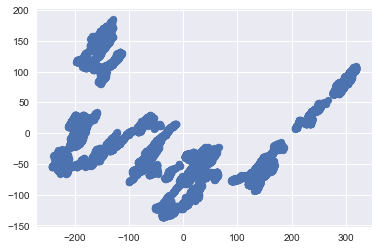

In [62]:
import pylab as pl
pl.scatter(X_Reduced[:, 0], X_Reduced[:,1],cmap="RdYlBu")

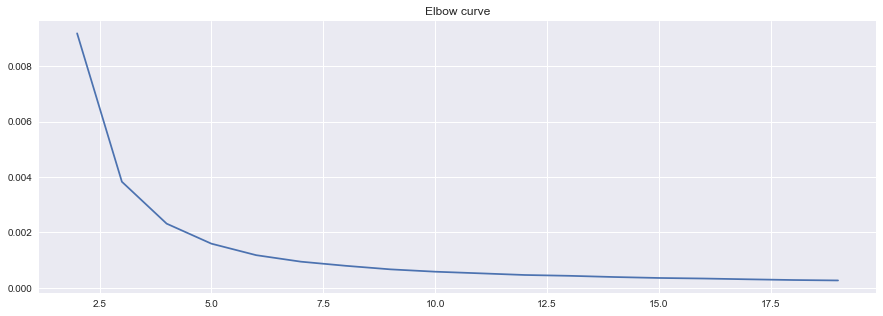

In [63]:
from math import sqrt
from sklearn.cluster import KMeans

# XIRR V VOL
returns = stock_data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['VOL'] = stock_data.pct_change().std() * sqrt(252)
 
# make array for k
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['VOL'])]).T
 
X = data
#within cluster sum of squares.we calculate the sum of squares of the distance of each data point 
# in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [64]:
#the change in slope of curve is not significant after k=6. Hence we select no. of clusters to be 6

# computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)



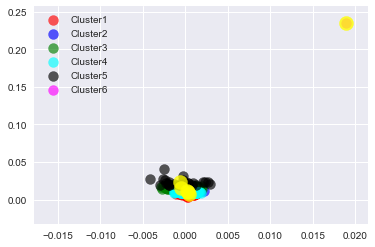

In [65]:
#using scatter plt 
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)
plt.scatter(X[idx==5,0],X[idx==5,1],s=100,c='magenta',label='Cluster6',alpha=0.65)
#plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.8)
plt.legend()
plt.show()

The little dot in the upper right hand corner is a outlier , we need to find out which stock is this and then we need to get rid of it

In [66]:
print(returns.idxmax())

Returns    NYSE.XRX
VOL        NYSE.XRX
dtype: object


In [67]:
returns.drop('NYSE.XRX',inplace=True)

# fix the array
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['VOL'])]).T


Reploting the clusters after getting rid of outlier

In [68]:
import pylab
from pylab import rcParams



# computing K-Means with K = 6 (6 clusters)
centroids,_ = kmeans(data,6)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

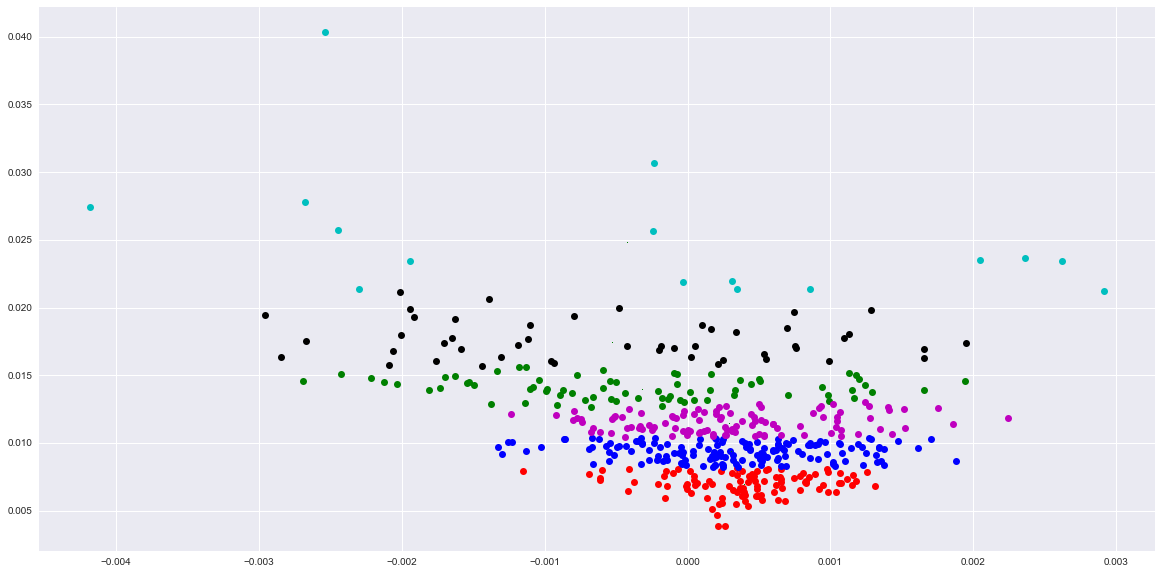

In [69]:
import pylab
from pylab import rcParams

rcParams['figure.figsize'] = 20, 10
centroids,_ = kmeans(data,6)
idx,_ = vq(data,centroids)

pylab.plot(data[idx==0,0],data[idx==0,1],'or',
     data[idx==1,0],data[idx==1,1],'ob',
     data[idx==2,0],data[idx==2,1],'og',
     data[idx==3,0],data[idx==3,1],'oc',
     data[idx==4,0],data[idx==4,1],'ok',
     data[idx==5,0],data[idx==5,1],'om')        
pylab.plot(centroids[:,0],centroids[:,1],'sg',markersize=1)
pylab.show()

To see which stocks are grouped togather

In [70]:
#Finally to get the details of which stock is actually in which cluster we can run the following line of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [71]:
labels =['Stock Symbol', 'Cluster']
df = pd.DataFrame.from_records(details, columns=labels)
df.head(n=10)

,Stock Symbol,Cluster
0,NASDAQ.AAL,2
1,NASDAQ.AAPL,1
2,NASDAQ.ADBE,1
3,NASDAQ.ADI,5
4,NASDAQ.ADP,5
5,NASDAQ.ADSK,4
6,NASDAQ.AKAM,4
7,NASDAQ.ALXN,4
8,NASDAQ.AMAT,2
9,NASDAQ.AMD,3


In [72]:
stocks = [(id,group) for id, group in zip(returns.index,idx)]
 
for stock in stocks:
    print(stock)

('NASDAQ.AAL', 2)
('NASDAQ.AAPL', 1)
('NASDAQ.ADBE', 1)
('NASDAQ.ADI', 5)
('NASDAQ.ADP', 5)
('NASDAQ.ADSK', 4)
('NASDAQ.AKAM', 4)
('NASDAQ.ALXN', 4)
('NASDAQ.AMAT', 2)
('NASDAQ.AMD', 3)
('NASDAQ.AMGN', 1)
('NASDAQ.AMZN', 5)
('NASDAQ.ATVI', 5)
('NASDAQ.AVGO', 5)
('NASDAQ.BBBY', 2)
('NASDAQ.BIIB', 5)
('NASDAQ.CA', 2)
('NASDAQ.CBOE', 1)
('NASDAQ.CELG', 1)
('NASDAQ.CERN', 1)
('NASDAQ.CHRW', 5)
('NASDAQ.CHTR', 2)
('NASDAQ.CINF', 1)
('NASDAQ.CMCSA', 1)
('NASDAQ.CME', 1)
('NASDAQ.COST', 1)
('NASDAQ.CSCO', 1)
('NASDAQ.CSX', 5)
('NASDAQ.CTAS', 1)
('NASDAQ.CTSH', 0)
('NASDAQ.CTXS', 5)
('NASDAQ.DISCA', 2)
('NASDAQ.DISCK', 2)
('NASDAQ.DISH', 2)
('NASDAQ.DLTR', 4)
('NASDAQ.EA', 2)
('NASDAQ.EBAY', 5)
('NASDAQ.EQIX', 5)
('NASDAQ.ESRX', 2)
('NASDAQ.ETFC', 5)
('NASDAQ.EXPD', 1)
('NASDAQ.EXPE', 5)
('NASDAQ.FAST', 2)
('NASDAQ.FB', 1)
('NASDAQ.FFIV', 2)
('NASDAQ.FISV', 0)
('NASDAQ.FITB', 5)
('NASDAQ.FLIR', 5)
('NASDAQ.FOX', 5)
('NASDAQ.FOXA', 2)
('NASDAQ.GILD', 1)
('NASDAQ.GOOG', 1)
('NASDAQ.GOOGL', 1)
('